In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_json('ultimate_data_challenge.json')

In [3]:
print(df.head())

             city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                       4  2014-01-25                   4.7   
1         Astapor                       0  2014-01-29                   5.0   
2         Astapor                       3  2014-01-06                   4.3   
3  King's Landing                       9  2014-01-10                   4.6   
4      Winterfell                      14  2014-01-27                   4.4   

   avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
0       1.10     2014-06-17   iPhone       15.4                 True   
1       1.00     2014-05-05  Android        0.0                False   
2       1.00     2014-01-07   iPhone        0.0                False   
3       1.14     2014-06-29   iPhone       20.0                 True   
4       1.19     2014-03-15  Android       11.8                False   

   weekday_pct  avg_dist  avg_rating_by_driver  
0         46.2      3.67                   

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB
None


In [5]:
print(df.isnull().sum())

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64


In [6]:
print(df.describe())

       trips_in_first_30_days  avg_rating_of_driver     avg_surge  \
count            50000.000000          41878.000000  50000.000000   
mean                 2.278200              4.601559      1.074764   
std                  3.792684              0.617338      0.222336   
min                  0.000000              1.000000      1.000000   
25%                  0.000000              4.300000      1.000000   
50%                  1.000000              4.900000      1.000000   
75%                  3.000000              5.000000      1.050000   
max                125.000000              5.000000      8.000000   

          surge_pct   weekday_pct      avg_dist  avg_rating_by_driver  
count  50000.000000  50000.000000  50000.000000          49799.000000  
mean       8.849536     60.926084      5.796827              4.778158  
std       19.958811     37.081503      5.707357              0.446652  
min        0.000000      0.000000      0.000000              1.000000  
25%        0.00000

In [24]:

df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

df['active_in_sixth_month'] = ((df['last_trip_date'] - df['signup_date']) >= pd.Timedelta('150 days')) & \
                               ((df['last_trip_date'] - df['signup_date']) < pd.Timedelta('180 days'))

percent_active_in_sixth_month = df['active_in_sixth_month'].mean()
print('Percent of users active in the 6th month:', percent_active_in_sixth_month)


Percent of users active in the 6th month: 0.25258


In [13]:
corr = df.corr()

/var/folders/tj/71y3kkvs217c8cfqvcdtk75m0000gn/T/ipykernel_26031/658818363.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


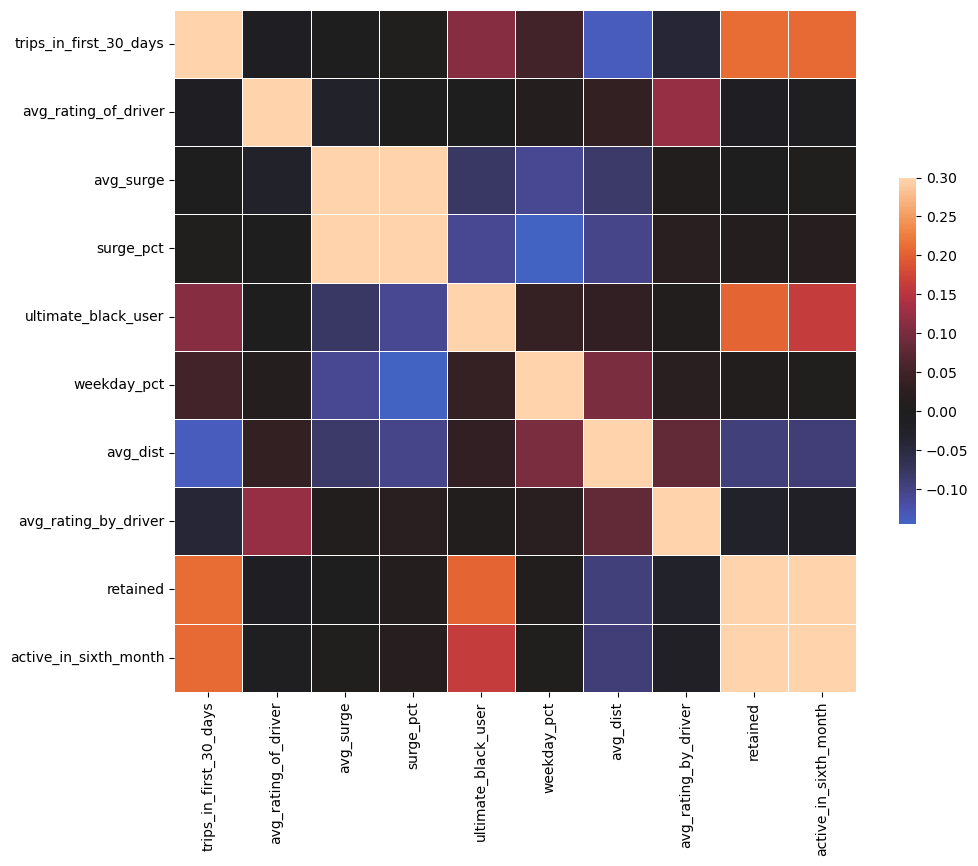

In [14]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

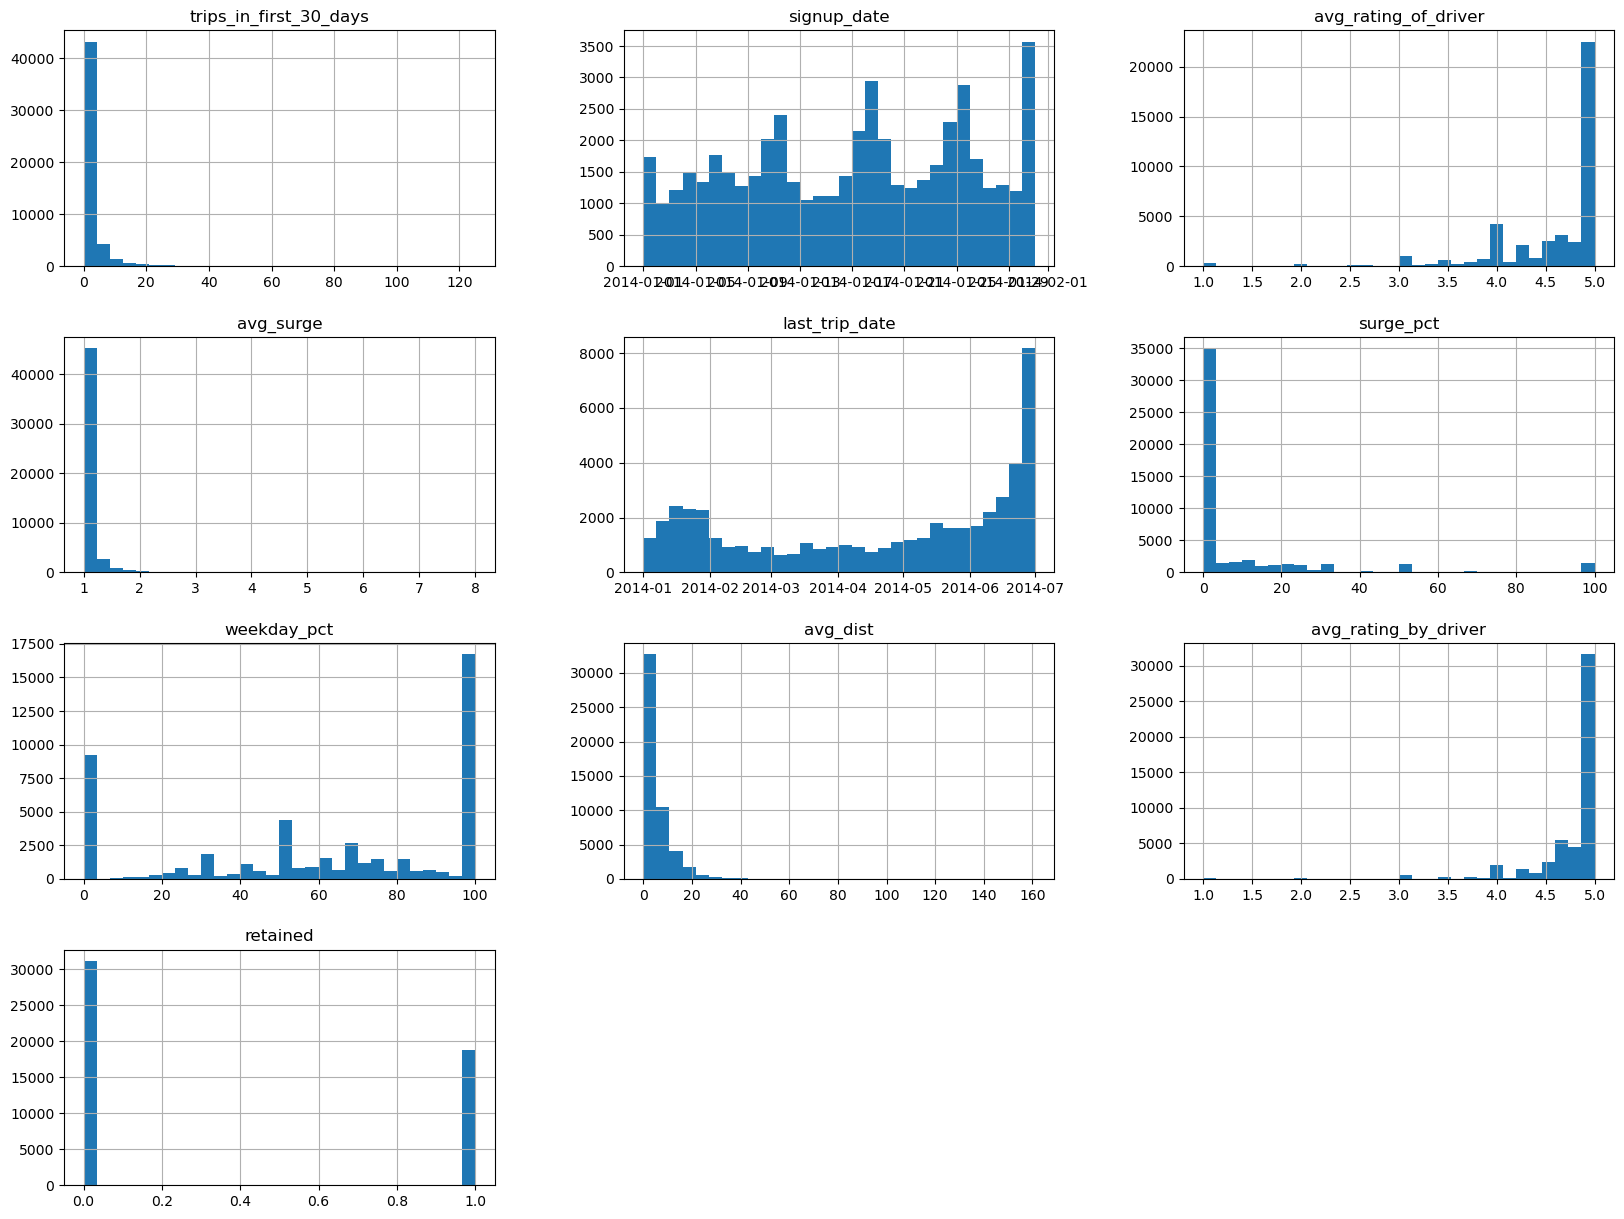

In [15]:
df.hist(bins=30, figsize=(20,15))
plt.show()

In [16]:
df = df.fillna(df.mean())
df_dummies = pd.get_dummies(df)

/var/folders/tj/71y3kkvs217c8cfqvcdtk75m0000gn/T/ipykernel_26031/1163373156.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df = df.fillna(df.mean())
/var/folders/tj/71y3kkvs217c8cfqvcdtk75m0000gn/T/ipykernel_26031/1163373156.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
 12  retained                50000 non-null  int64 

In [18]:
df_dummies = pd.get_dummies(df, columns=['city', 'phone', 'ultimate_black_user'])

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

In [20]:
X = df_dummies.drop(['signup_date', 'last_trip_date', 'retained'], axis=1)
y = df_dummies['retained']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [22]:
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred)}')

Accuracy: 0.8695333333333334
ROC AUC Score: 0.8502994791723473


<Axes: >

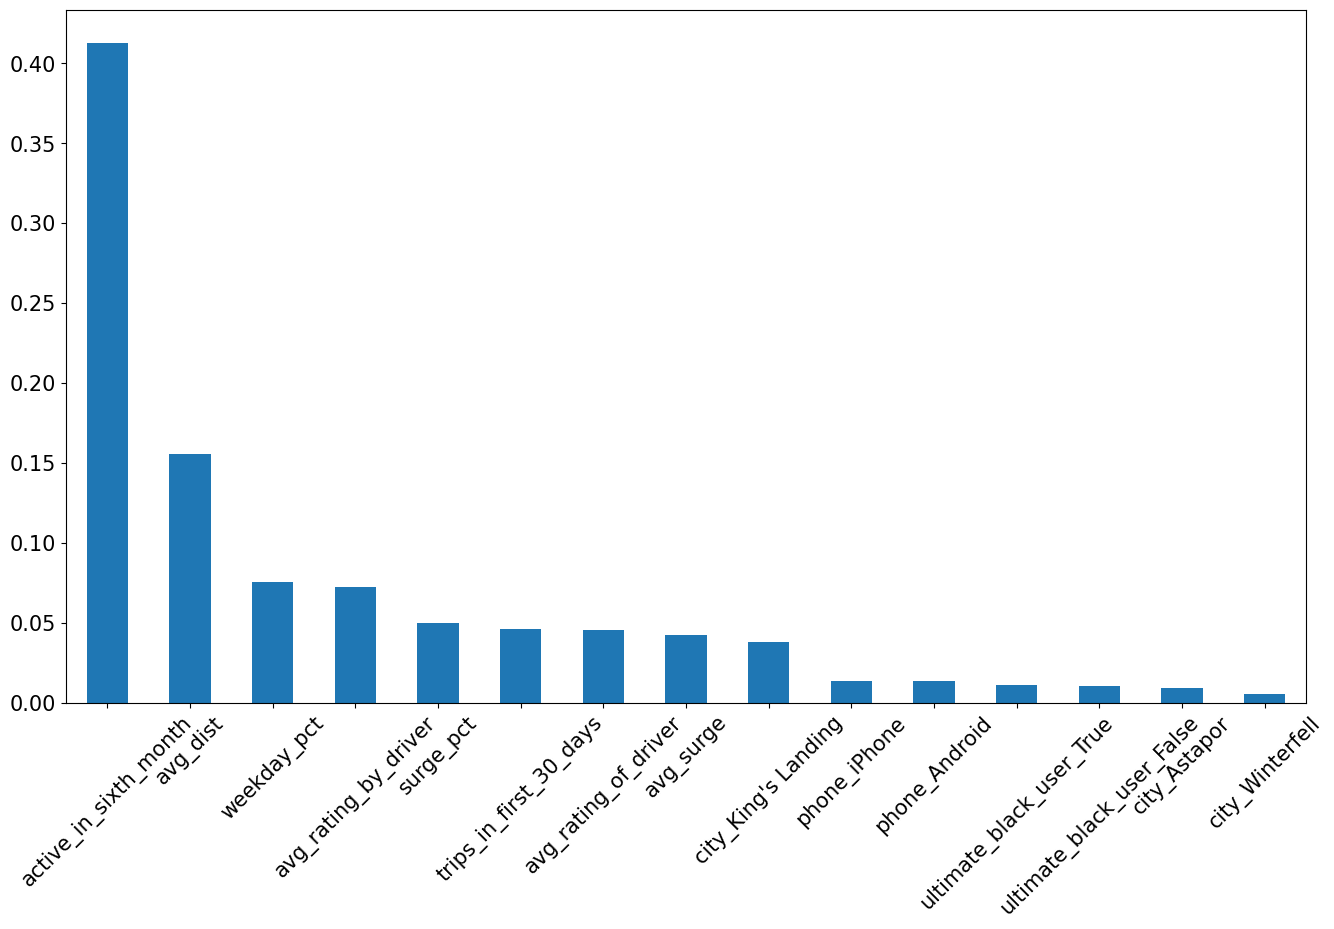

In [23]:
importances = model.feature_importances_

f_importances = pd.Series(importances, df_dummies.drop(['signup_date', 'last_trip_date', 'retained'], axis=1).columns)

f_importances.sort_values(ascending=False, inplace=True)

f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=15)


I chose to use Random Forest Model because it's a versatile machine learning model that can record complex patterns in data. It's known to handle categorical data and it has a resistance to overfitting. Alternatives I had considered  were either Logistic regression or gradient boosting. Logistic Regression may be simpler, but it's powerful. Gradient Boosting sometimes outperforms Random Forest but it can overfit which is why I did not choose this. The main concern with Random Forest was interpretation, it does give good performance but it can be difficult to explain why the model made this prediction. Could become a problem if we want to understand specific factors that contributed to a user being active. The model is valid because of the high accuracy of the ROC AUC scores. These are the key indicators of the performance. The accuracy measures the proportion of total predictions that the model got right, and the ROC score tells us the model is capable at distinguising between active and inactive users in the 6th month.

Ultimate could leverage city and phone type. These variables showed importance predicting user retention, it can be geographical or technological factors affecting long-term user activity. The trips in the first 30 days could be another factor, this feature proves to be a strong indicator of user retention. Users who ride more frequently when they first sign up may develop a habit of using service.